In [1]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 获取当前 Notebook 的路径
current_dir = os.path.dirname(os.path.abspath("__file__"))

# 获取上一级目录
parent_dir = os.path.dirname(current_dir)

# 添加上一级目录到 sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from eap.graph import Graph
from utils import read_jsonl

In [2]:
model = "gpt2"

In [3]:
revised_entity_first_token_accuracy = [
    0.103173058,
    0.103951723,
    0.106871715,
    0.102978392,
    0.101421063,
    0.101810395,
    0.105314386,
    0.107261047,
    0.110570372,
    0.125364999,
    0.155732918,
    0.22639673,
    0.317500487,
    0.41736422,
    0.514307962,
    0.584387775,
    0.633248978,
    0.671014211,
    0.709752774,
    0.739926027,
    0.773797937,
    0.792485887,
    0.815261826,
    0.827525793,
    0.84232042,
    0.863928363,
    0.87015768,
    0.881837648,
    0.895269613,
    0.897216274,
    0.907922912,
    0.9125949,
    0.910842904,
    0.915514892,
    0.919213549,
    0.924858867,
    0.922912206,
    0.929530855,
    0.927194861,
    0.925637532,
    0.933618844
]

In [4]:
new_entity_first_token_accuracy = [
    0.103716002,
    0.104155476,
    0.104106646,
    0.105180917,
    0.105180917,
    0.10449729,
    0.104350798,
    0.106352849,
    0.107817765,
    0.112700815,
    0.126812833,
    0.150593291,
    0.190097173,
    0.24156453,
    0.298598564,
    0.365398701,
    0.432784804,
    0.479759754,
    0.541090874,
    0.586600908,
    0.629034621,
    0.664143757,
    0.697592656,
    0.726451487,
    0.752575809,
    0.775428488,
    0.794130573,
    0.809414522,
    0.828751404,
    0.842863421,
    0.855461692,
    0.867278676,
    0.874114947,
    0.886127252,
    0.890814981,
    0.898090727,
    0.902729625,
    0.906391914,
    0.910884321,
    0.914546609,
    0.917085795
]

In [5]:
x_coords = np.arange(len(new_entity_first_token_accuracy)) / (len(new_entity_first_token_accuracy) - 1) * 24

In [6]:
directory_path="../outputs/train/gpt2/2024-12-19-22-27-33/checkpoints"
subdirectories = [
    name for name in os.listdir(directory_path)
    if os.path.isdir(os.path.join(directory_path, name))
]

In [7]:
new_entity_result_matrix = []
revised_entity_result_matrix = []
to_delete = []
for dir_name in subdirectories:
    prediction_file = os.path.join(directory_path, dir_name, "prediction.jsonl")
    if not os.path.exists(prediction_file):
        print(f"Prediction file not found for directory '{dir_name}'")
        to_delete.append(dir_name)
    else:
        print(f"Reading prediction file for directory '{dir_name}'")
        predictions = read_jsonl(prediction_file)
        N = len(predictions)
        new_entity_num = int(0.5 * N)
        new_entity_result = [pred["correct"] for pred in predictions][:new_entity_num]
        new_entity_result_matrix.append(new_entity_result)
        revised_entity_result = [pred["correct"] for pred in predictions][new_entity_num:]
        revised_entity_result_matrix.append(revised_entity_result)

for dir_name in to_delete:
    subdirectories.remove(dir_name)

Reading prediction file for directory 'checkpoint-1716'
Reading prediction file for directory 'checkpoint-163'
Reading prediction file for directory 'checkpoint-1798'
Reading prediction file for directory 'checkpoint-1308'
Reading prediction file for directory 'checkpoint-245'
Reading prediction file for directory 'checkpoint-981'
Reading prediction file for directory 'checkpoint-2025'
Reading prediction file for directory 'checkpoint-1144'
Reading prediction file for directory 'checkpoint-572'
Reading prediction file for directory 'checkpoint-1635'
Reading prediction file for directory 'checkpoint-490'
Reading prediction file for directory 'checkpoint-1880'
Reading prediction file for directory 'checkpoint-1962'
Reading prediction file for directory 'checkpoint-1553'
Reading prediction file for directory 'checkpoint-1389'
Reading prediction file for directory 'checkpoint-327'
Reading prediction file for directory 'checkpoint-735'
Reading prediction file for directory 'checkpoint-654'


In [8]:
indexes = sorted(range(len(subdirectories)), key=lambda i: int(subdirectories[i].split('-')[1]))

print("排序后的下标列表：", indexes)

排序后的下标列表： [20, 1, 4, 15, 23, 10, 8, 17, 16, 18, 21, 5, 19, 7, 22, 3, 14, 24, 13, 9, 0, 2, 11, 12, 6]


In [9]:
new_entity_result_matrix = [new_entity_result_matrix[i] for i in indexes]
new_entity_result_matrix = np.array(new_entity_result_matrix)
revised_entity_result_matrix = [revised_entity_result_matrix[i] for i in indexes]
revised_entity_result_matrix = np.array(revised_entity_result_matrix)

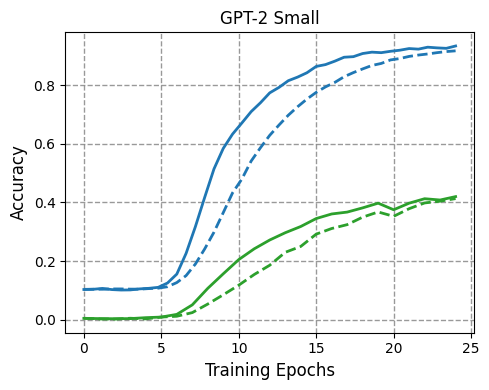

In [10]:
new_entity_accuracy = np.mean(new_entity_result_matrix, axis=1)
revised_entity_accuracy = np.mean(revised_entity_result_matrix, axis=1)

plt.figure(figsize=(5, 4))
plt.plot(x_coords, revised_entity_first_token_accuracy, label='First-token Acc (K_rel)', linewidth=2, color='C0')
plt.plot(x_coords, new_entity_first_token_accuracy, label='First-token Acc (K_compl)', linewidth=2, color='C0', linestyle='--')
plt.plot(revised_entity_accuracy, label='Query Acc (K_rel)', linewidth=2, color='C2')
plt.plot(new_entity_accuracy, label='Query Acc (K_compl)', linewidth=2, color='C2', linestyle='--')

plt.title('GPT-2 Small')
plt.xlabel('Training Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
# plt.legend(loc='best', frameon=True, framealpha=0.9)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)

# # Annotate each point with its accuracy value
# for i, accuracy in enumerate(new_entity_accuracy):
#     plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

# for i, accuracy in enumerate(revised_entity_accuracy):
#     plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

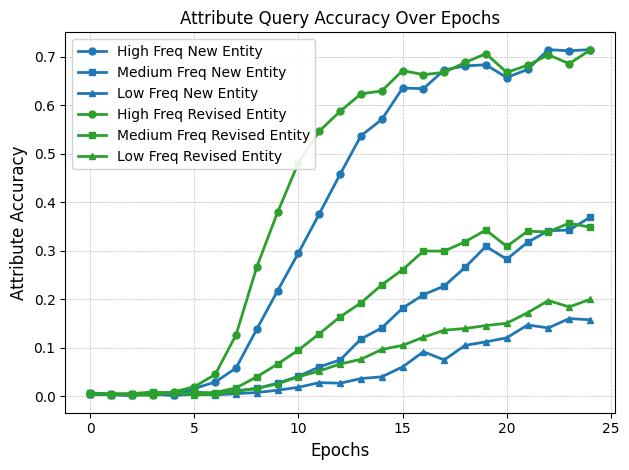

In [11]:
num_columns = new_entity_result_matrix.shape[1]  # 获取列数
num_columns_to_average = num_columns // 3

high_new_entity_accuracy = np.mean(new_entity_result_matrix[:, :num_columns_to_average], axis=1)
high_revised_entity_accuracy = np.mean(revised_entity_result_matrix[:, :num_columns_to_average], axis=1)

medium_new_entity_accuracy = np.mean(new_entity_result_matrix[:, num_columns_to_average: 2*num_columns_to_average], axis=1)
medium_revised_entity_accuracy = np.mean(revised_entity_result_matrix[:, num_columns_to_average: 2*num_columns_to_average], axis=1)

low_new_entity_accuracy = np.mean(new_entity_result_matrix[:, -num_columns_to_average:], axis=1)
low_revised_entity_accuracy = np.mean(revised_entity_result_matrix[:, -num_columns_to_average:], axis=1)


plt.plot(high_new_entity_accuracy, label='High Freq New Entity', color='C0', marker='o', linewidth=2, markersize=5)
plt.plot(medium_new_entity_accuracy, label='Medium Freq New Entity', color='C0', marker='s', linewidth=2, markersize=5)
plt.plot(low_new_entity_accuracy, label='Low Freq New Entity', color='C0', marker='^', linewidth=2, markersize=5)

plt.plot(high_revised_entity_accuracy, label='High Freq Revised Entity', color='C2', marker='o', linewidth=2, markersize=5)
plt.plot(medium_revised_entity_accuracy, label='Medium Freq Revised Entity', color='C2', marker='s', linewidth=2, markersize=5)
plt.plot(low_revised_entity_accuracy, label='Low Freq Revised Entity', color='C2', marker='^', linewidth=2, markersize=5)

plt.title('Attribute Query Accuracy Over Epochs')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Attribute Accuracy', fontsize=12)
plt.legend(loc='best', frameon=True, framealpha=0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Annotate each point with its accuracy value
# for i, accuracy in enumerate(new_entity_accuracy):
#     plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

# for i, accuracy in enumerate(revised_entity_accuracy):
#     plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

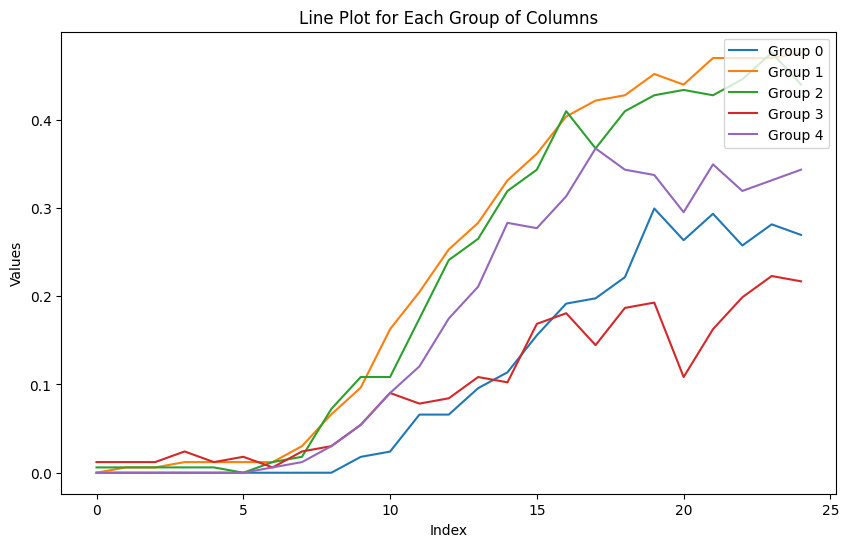

In [12]:
# 拆分矩阵，按第二维除以5的余数进行分组
# 创建5个子矩阵，每个子矩阵包含按除以5余数拆分的行
split_matrices = {i: [] for i in range(5)}

# 遍历矩阵的列，按余数分组
for j in range(revised_entity_result_matrix[:, num_columns_to_average+2:2*num_columns_to_average].shape[1]):
    remainder = j % 5  # 计算列索引除以5的余数
    split_matrices[remainder].append(revised_entity_result_matrix[:, num_columns_to_average+2:2*num_columns_to_average][:, j])

# 绘制每个拆分后的子矩阵的折线图
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(np.mean(split_matrices[i], axis=0), label=f'Group {i}')

plt.title('Line Plot for Each Group of Columns')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()

In [13]:
def reduce_array(arr, n):
    """
    将有序数组的元素减少到 n 个，均匀删减元素。

    参数:
    - arr: 原始有序数组
    - n: 缩减后的元素数量

    返回:
    - 新的缩减后数组
    """
    N = len(arr)
    if n >= N:
        return arr  # 如果需要的元素数量大于或等于原数组数量，则返回原数组

    # 计算步长 step，确保均匀删减
    step = N / n

    # 保留均匀分布的 n 个元素
    reduced_arr = [arr[int(i * step)] for i in range(n)]

    return reduced_arr

In [14]:
n = 1000
ensembeld_new_entity_result_matrix = [[sum(reduce_array(line, n)[i:i + 5]) for i in range(0, n, 5)] for line in new_entity_result_matrix]
ensembeld_new_entity_result_matrix = np.array(ensembeld_new_entity_result_matrix)
ensembeld_new_entity_result_matrix.shape

(25, 200)

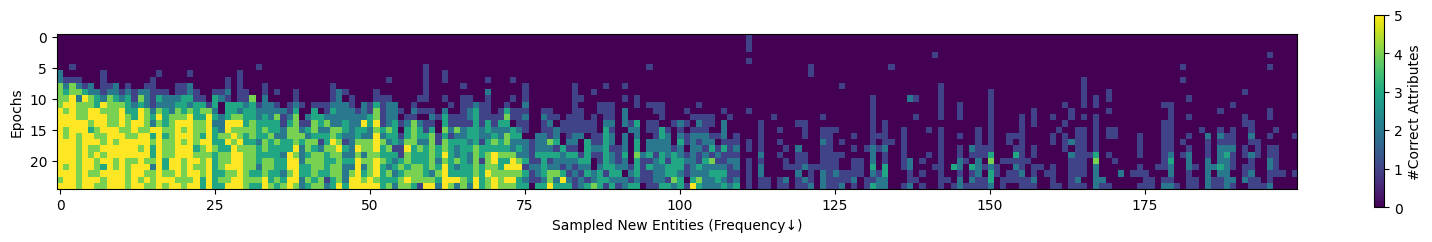

In [15]:
plt.figure(figsize=(20, 2.5))  # 调整宽度和高度
plt.imshow(ensembeld_new_entity_result_matrix, cmap='viridis', interpolation='nearest')
plt.ylabel('Epochs')
plt.xlabel('Sampled New Entities (Frequency↓)')
plt.colorbar().set_label('#Correct Attributes')
plt.show()

In [16]:
ensembeld_revised_entity_result_matrix = [[sum(reduce_array(line, n)[i:i + 5]) for i in range(0, n, 5)] for line in revised_entity_result_matrix]
ensembeld_revised_entity_result_matrix = np.array(ensembeld_revised_entity_result_matrix)
ensembeld_revised_entity_result_matrix.shape

(25, 200)

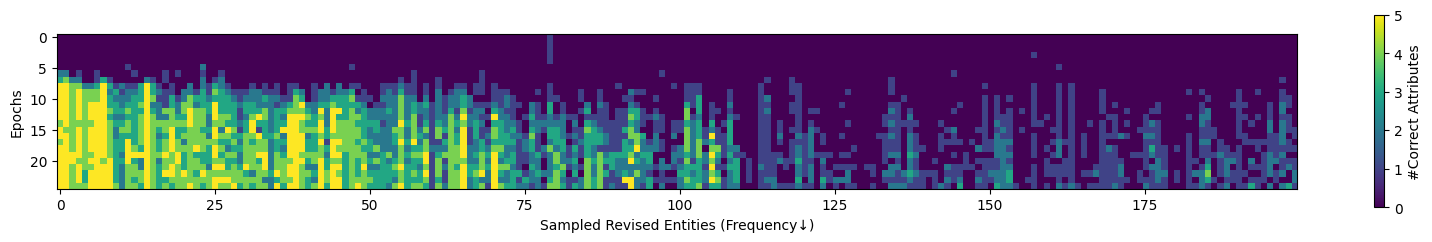

In [17]:
plt.figure(figsize=(20, 2.5))  # 调整宽度和高度
plt.imshow(ensembeld_revised_entity_result_matrix, cmap='viridis', interpolation='nearest')
plt.ylabel('Epochs')
plt.xlabel('Sampled Revised Entities (Frequency↓)')
plt.colorbar().set_label('#Correct Attributes')
plt.show()

In [18]:
hit_at_10_results = {
    "new": {
        "high": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        },
        "medium": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        },
        "low": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        }
    },
    "revised": {
        "high": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        },
        "medium": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        },
        "low": {
            "new": {
                "high": [],
                "medium": [],
                "low": []
            },
            "revised": {
                "high": [],
                "medium": [],
                "low": []
            }
        }
    }
}

import copy
first_hit_at_10_results = copy.deepcopy(hit_at_10_results)
seventh_hit_at_10_results = copy.deepcopy(hit_at_10_results)
eighth_hit_at_10_results = copy.deepcopy(hit_at_10_results)
last_hit_at_10_results = copy.deepcopy(hit_at_10_results)

k_type = {
    "new": "K_compl",
    "revised": "K_rel"
}

topn = 8000
circuit_n = 300
for task in ["city"]:
    for index in tqdm(indexes):
        for source_type in ["new", "revised"]:
            for source_frequency in ["high", "medium", "low"]:
                target_type = source_type
                # target_frequency = source_frequency
                # for target_type in ["new", "revised"]:
                for target_frequency in ["high", "medium", "low"]:
                    result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{source_type}", f"frequency_{source_frequency}", "method_EAP-IG", f"topn_{topn}", f"target_type_{target_type}", f"target_frequency_{target_frequency}", f"{task}_prediction.jsonl")
                    results = read_jsonl(result_file)
                    hit_at_10 = len([d for d in results if d["token_rank"] <= 9]) / len(results)
                    hit_at_10_results[source_type][source_frequency][target_type][target_frequency].append(hit_at_10)

100%|██████████| 25/25 [00:00<00:00, 39.14it/s]


In [19]:
for task in ["city"]:
    for index in tqdm(indexes):
        for source_type in ["new", "revised"]:
            for source_frequency in ["high", "medium", "low"]:
                target_type = source_type
                target_frequency = source_frequency
                result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{source_type}", f"frequency_{source_frequency}", "method_EAP-IG", f"topn_{topn}", f"target_type_{target_type}", f"target_frequency_{target_frequency}", f"{task}_first_prediction.jsonl")
                results = read_jsonl(result_file)
                hit_at_10 = len([d for d in results if d["token_rank"] <= 9]) / len(results)
                first_hit_at_10_results[source_type][source_frequency][target_type][target_frequency].append(hit_at_10)
                
                result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{source_type}", f"frequency_{source_frequency}", "method_EAP-IG", f"topn_{topn}", f"target_type_{target_type}", f"target_frequency_{target_frequency}", f"{task}_seventh_prediction.jsonl")
                results = read_jsonl(result_file)
                hit_at_10 = len([d for d in results if d["token_rank"] <= 9]) / len(results)
                seventh_hit_at_10_results[source_type][source_frequency][target_type][target_frequency].append(hit_at_10)
                
                result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{source_type}", f"frequency_{source_frequency}", "method_EAP-IG", f"topn_{topn}", f"target_type_{target_type}", f"target_frequency_{target_frequency}", f"{task}_eighth_prediction.jsonl")
                results = read_jsonl(result_file)
                hit_at_10 = len([d for d in results if d["token_rank"] <= 9]) / len(results)
                eighth_hit_at_10_results[source_type][source_frequency][target_type][target_frequency].append(hit_at_10)
                
                result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{source_type}", f"frequency_{source_frequency}", "method_EAP-IG", f"topn_{topn}", f"target_type_{target_type}", f"target_frequency_{target_frequency}", f"{task}_last_prediction.jsonl")
                results = read_jsonl(result_file)
                hit_at_10 = len([d for d in results if d["token_rank"] <= 9]) / len(results)
                last_hit_at_10_results[source_type][source_frequency][target_type][target_frequency].append(hit_at_10)

100%|██████████| 25/25 [00:01<00:00, 19.11it/s]


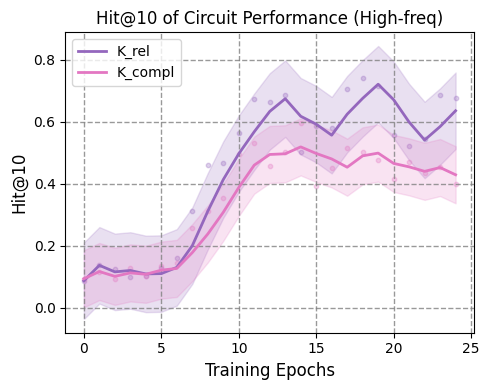

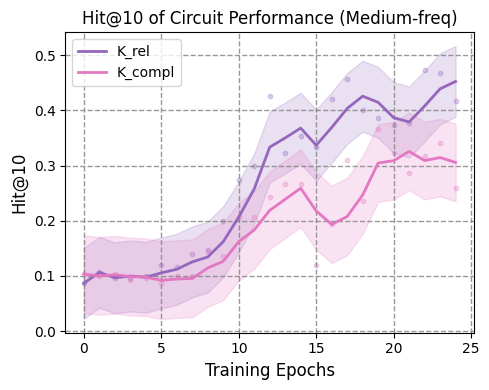

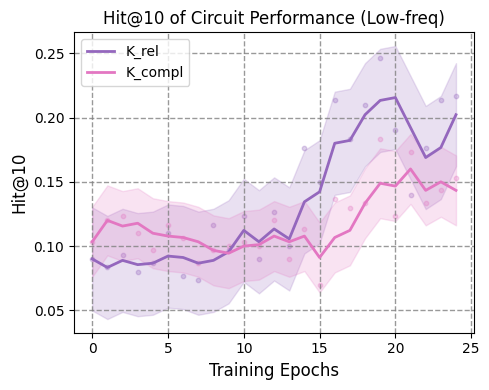

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(len(indexes))
for source_frequency in ["high", "medium", "low"]:
    plt.figure(figsize=(5, 4))
    color_cnt = 4
    for source_type in ["revised", "new"]:
        y = [0 for _ in range(len(indexes))]
        cnt = 0
        target_type = source_type
        target_frequency = source_frequency
        for i, hit_at_10 in enumerate(hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
            y[i] += hit_at_10
        cnt += 1
        y = [v / cnt for v in y]
        
        window_size = 3
        x_fit = x
        y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
        y_fit = np.array(y[:window_size-1] + y_fit.tolist())
        y_residuals = y - y_fit
        std_residuals = np.std(y_residuals)
        
        line, = plt.plot(x_fit.ravel(), y_fit, label=f'{k_type[source_type].capitalize()}', linewidth=2, color=f'C{color_cnt}')
        plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
        
        # 绘制阴影区域，偏离值区域
        plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)
        
        color_cnt += 2

    plt.title(f'Hit@10 of Circuit Performance ({source_frequency.capitalize()}-freq)', fontsize=12)
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Hit@10', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

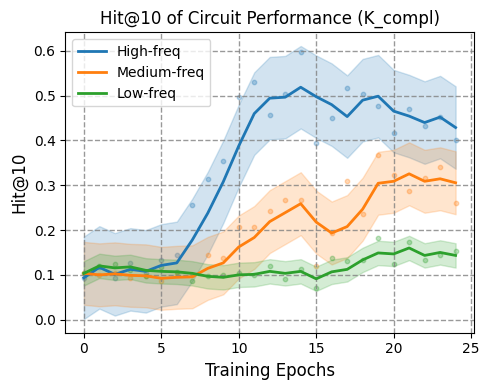

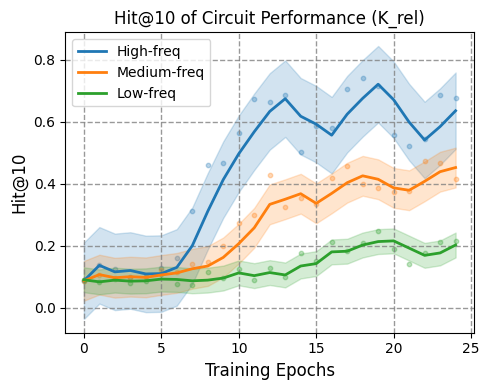

In [21]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(len(indexes))
for source_type in ["new", "revised"]:
    plt.figure(figsize=(5, 4))
    for source_frequency in ["high", "medium", "low"]:
        y = [0 for _ in range(len(indexes))]
        cnt = 0
        target_type = source_type
        target_frequency = source_frequency
        for i, hit_at_10 in enumerate(hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
            y[i] += hit_at_10
        cnt += 1

        y = [v / cnt for v in y]
        
        window_size = 3
        x_fit = x
        y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
        y_fit = np.array(y[:window_size-1] + y_fit.tolist())
        y_residuals = y - y_fit
        std_residuals = np.std(y_residuals)

        line, = plt.plot(x_fit, y_fit, label=f'{source_frequency.capitalize()}-freq', linewidth=2)
        plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
        
        # 绘制阴影区域，偏离值区域
        plt.fill_between(x_fit, y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

    plt.title(f'Hit@10 of Circuit Performance ({k_type[source_type]})', fontsize=12)
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Hit@10', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

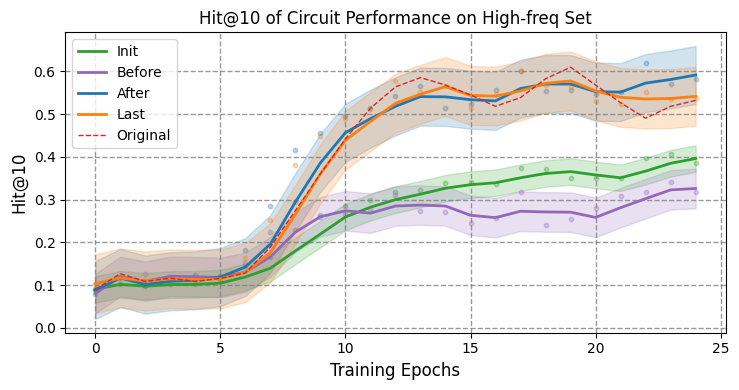

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

window_size = 3


x = np.arange(len(indexes))
source_frequency = "high"
plt.figure(figsize=(7.5, 4))
target_frequency = source_frequency

type_list = ["new", "revised"]

y = [0 for _ in range(len(indexes))]
cnt = 0
for source_type in type_list:
    target_type = source_type
    for i, hit_at_10 in enumerate(first_hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
        y[i] += hit_at_10
    cnt += 1
y = [v / cnt for v in y]
x_fit = x
y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
y_fit = np.array(y[:window_size-1] + y_fit.tolist())
y_residuals = y - y_fit
std_residuals = np.std(y_residuals)
line, = plt.plot(x_fit.ravel(), y_fit, label=f'Init', linewidth=2, color=f'C2')
plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

y = [0 for _ in range(len(indexes))]
cnt = 0
for source_type in type_list:
    target_type = source_type
    for i, hit_at_10 in enumerate(seventh_hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
        y[i] += hit_at_10
    cnt += 1
y = [v / cnt for v in y]
x_fit = x
y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
y_fit = np.array(y[:window_size-1] + y_fit.tolist())
y_residuals = y - y_fit
std_residuals = np.std(y_residuals)
line, = plt.plot(x_fit.ravel(), y_fit, label=f'Before', linewidth=2, color=f'C4')
plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

y = [0 for _ in range(len(indexes))]
cnt = 0
for source_type in type_list:
    target_type = source_type
    for i, hit_at_10 in enumerate(eighth_hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
        y[i] += hit_at_10
    cnt += 1
y = [v / cnt for v in y]
x_fit = x
y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
y_fit = np.array(y[:window_size-1] + y_fit.tolist())
y_residuals = y - y_fit
std_residuals = np.std(y_residuals)
line, = plt.plot(x_fit.ravel(), y_fit, label=f'After', linewidth=2, color=f'C0')
plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

y = [0 for _ in range(len(indexes))]
cnt = 0
for source_type in type_list:
    target_type = source_type
    for i, hit_at_10 in enumerate(last_hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
        y[i] += hit_at_10
    cnt += 1
y = [v / cnt for v in y]
x_fit = x
y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
y_fit = np.array(y[:window_size-1] + y_fit.tolist())
y_residuals = y - y_fit
std_residuals = np.std(y_residuals)
line, = plt.plot(x_fit.ravel(), y_fit, label=f'Last', linewidth=2, color=f'C1')
plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

y = [0 for _ in range(len(indexes))]
cnt = 0
for source_type in type_list:
    target_type = source_type
    for i, hit_at_10 in enumerate(hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
        y[i] += hit_at_10
    cnt += 1
y = [v / cnt for v in y]
x_fit = x
y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
y_fit = np.array(y[:window_size-1] + y_fit.tolist())
y_residuals = y - y_fit
std_residuals = np.std(y_residuals)
line, = plt.plot(x_fit.ravel(), y_fit, label=f'Original', linewidth=1, color=f'C3', linestyle='--')
# plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
# plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)


plt.title(f'Hit@10 of Circuit Performance on {source_frequency.capitalize()}-freq Set', fontsize=12)
plt.xlabel('Training Epochs', fontsize=12)
plt.ylabel('Hit@10', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

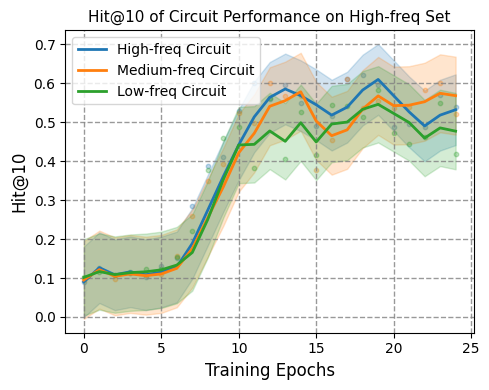

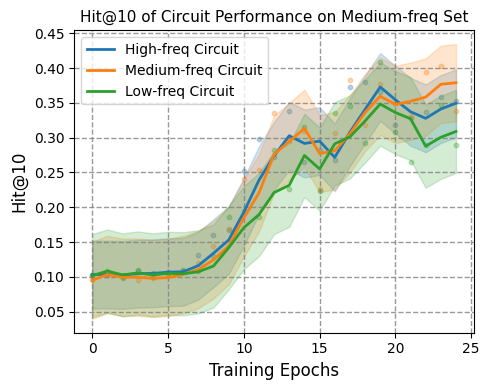

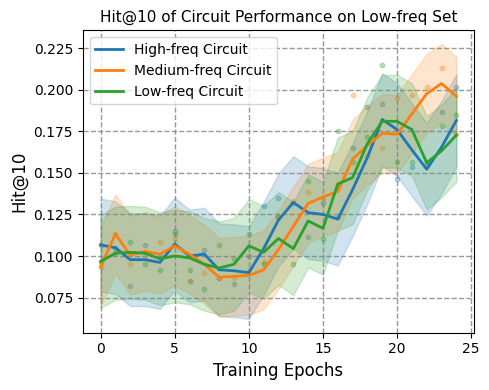

In [23]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(len(indexes))
for target_frequency in ["high", "medium", "low"]:
    plt.figure(figsize=(5, 4))
    for source_frequency in ["high", "medium", "low"]:
        y = [0 for _ in range(len(indexes))]
        cnt = 0
        for source_type in ["new", "revised"]:
            target_type = source_type
            for i, hit_at_10 in enumerate(hit_at_10_results[source_type][source_frequency][target_type][target_frequency]):
                y[i] += hit_at_10
            cnt += 1
        y = [v / cnt for v in y]
    
        window_size = 3
        x_fit = x
        y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
        y_fit = np.array(y[:window_size-1] + y_fit.tolist())
        y_residuals = y - y_fit
        std_residuals = np.std(y_residuals)

        line, = plt.plot(x_fit, y_fit, label=f'{source_frequency.capitalize()}-freq Circuit', linewidth=2)
        plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
        
        # 绘制阴影区域，偏离值区域
        plt.fill_between(x_fit, y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)

    plt.title(f'Hit@10 of Circuit Performance on {target_frequency.capitalize()}-freq Set', fontsize=11)
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Hit@10', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [24]:
from collections import defaultdict

def create_performance_dict():
    return defaultdict(lambda: {"new": create_freq_dict(), "revised": create_freq_dict()})

def create_freq_dict():
    # 使用 lambda 递归创建嵌套字典结构
    return {"high": [], "medium": [], "low": []}

# 使用函数创建相同结构的嵌套字典
faithfulness_performance = create_performance_dict()
edge_entropy = create_performance_dict()
graph = create_performance_dict()

for index in tqdm(indexes):
    for task in ["city"]:
        for type in ["new", "revised"]:
            for freq in ["high", "medium", "low"]:
                result_file = os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{type}", f"frequency_{freq}", "method_EAP-IG", f"topn_{topn}", f"{task}_results.json")
                results = json.load(open(result_file))
                faithfulness_performance[task][type][freq].append(results["faithfulness"])
                edge_entropy[task][type][freq].append(results["edge_entropy"])
                g = Graph.from_pt(os.path.join(directory_path, subdirectories[index], f"circuit_{circuit_n}", f"type_{type}", f"frequency_{freq}", "method_EAP-IG", f"topn_{topn}", f"{task}_graph.pt"))
                graph[task][type][freq].append(g)
            

100%|██████████| 25/25 [01:06<00:00,  2.64s/it]


In [25]:
def jaccard_similarity(a, b):
    """
    计算两个集合的 Jaccard 相似度。

    参数:
    - a: 集合 a
    - b: 集合 b

    返回:
    - Jaccard 相似度
    """
    set_a = set()
    for key, value in a.items():
        if value.in_graph:
             set_a.add(key)
    set_b = set()
    for key, value in b.items():
        if value.in_graph:
             set_b.add(key)
    return len(set_a & set_b) / len(set_a | set_b)

In [26]:
nodes_last_jaccard_similarity = create_performance_dict()
edges_last_jaccard_similarity = create_performance_dict()

for task in ["city"]:
    for type in ["new", "revised"]:
        for freq in ["high", "medium", "low"]:
            for i in range(1, len(indexes)):
                nodes_last_jaccard_similarity[task][type][freq].append(jaccard_similarity(graph[task][type][freq][i-1].nodes, graph[task][type][freq][-1].nodes))
                edges_last_jaccard_similarity[task][type][freq].append(jaccard_similarity(graph[task][type][freq][i-1].edges, graph[task][type][freq][-1].edges))

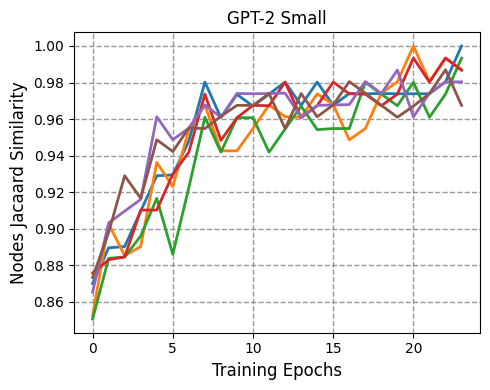

In [27]:
# Assuming `epochs` is the x-axis variable that defines the number of epochs
epochs = np.arange(len(nodes_last_jaccard_similarity[task]["new"]["high"]))  # Adjust if necessary

for task in ["city"]:
    # Set the figure size to increase x-axis width
    plt.figure(figsize=(5, 4))  # Adjust width and height as needed
    cnt = 0
    for type in ["new", "revised"]:
        for freq in ["high", "medium", "low"]:
            plt.plot(epochs, nodes_last_jaccard_similarity[task][type][freq], label=f'{freq.capitalize()} Freq {type.capitalize()} Entities', linewidth=2, color=f'C{cnt}')
            cnt += 1

    # Set titles and labels
    plt.title(f'GPT-2 Small')
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Nodes Jacaard Similarity', fontsize=12)
    # plt.legend(loc='best', frameon=True, framealpha=0.9)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

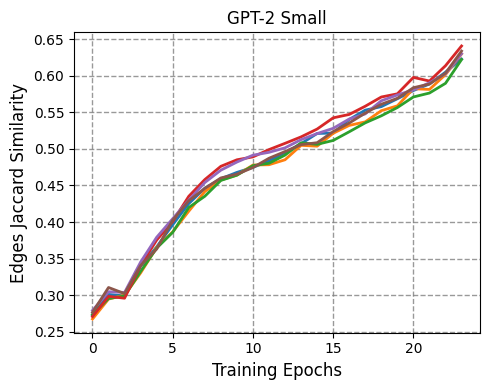

In [28]:
# Assuming `epochs` is the x-axis variable that defines the number of epochs
epochs = np.arange(len(edges_last_jaccard_similarity[task]["new"]["high"]))  # Adjust if necessary

for task in ["city"]:
    # Set the figure size to increase x-axis width
    plt.figure(figsize=(5, 4))  # Adjust width and height as needed
    cnt = 0
    for type in ["new", "revised"]:
        for freq in ["high", "medium", "low"]:
            plt.plot(epochs, edges_last_jaccard_similarity[task][type][freq], label=f'{freq.capitalize()} Freq {type.capitalize()} Entities', linewidth=2, color=f'C{cnt}')
            cnt += 1

    # Set titles and labels
    plt.title(f'GPT-2 Small')
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Edges Jaccard Similarity', fontsize=12)
    # plt.legend(loc='best', frameon=True, framealpha=0.9)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

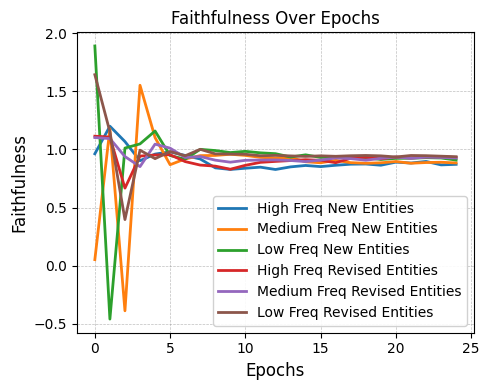

In [29]:
task = "city"

# Set the figure size to increase x-axis width
plt.figure(figsize=(5, 4))  # Adjust width and height as needed

# Assuming `epochs` is the x-axis variable that defines the number of epochs
epochs = np.arange(len(faithfulness_performance[task]["new"]["high"]))  # Adjust if necessary

cnt = 0
for type in ["new", "revised"]:
    for freq in ["high", "medium", "low"]:
        plt.plot(epochs, faithfulness_performance[task][type][freq], label=f'{freq.capitalize()} Freq {type.capitalize()} Entities', linewidth=2, color=f'C{cnt}')
        cnt += 1

# Set titles and labels
plt.title(f'Faithfulness Over Epochs')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Faithfulness', fontsize=12)
plt.legend(loc='best', frameon=True, framealpha=0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [30]:
import math

def calculate_entropy(g):
    # 获取所有边的 score 绝对值
    scores = [abs(edge.score) for edge in g.edges.values()]
    
    # 如果没有有效的 score 值，返回 None
    if not scores:
        return None
    
    # 归一化 score 值以生成概率分布
    total_score = sum(scores)
    probabilities = [score / total_score for score in scores]

    # 根据 Shannon 公式计算熵
    edge_entropy = -sum(p * math.log(p) for p in probabilities if p > 0)
    
    return edge_entropy

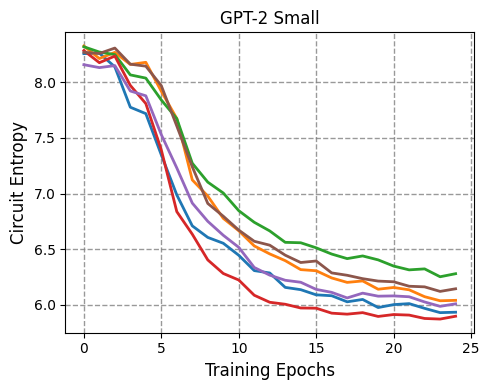

In [31]:
# Assuming `epochs` is the x-axis variable that defines the number of epochs
epochs = np.arange(len(edge_entropy["city"]["new"]["high"]))  # Adjust if necessary

for task in ["city"]:
    # Set the figure size to increase x-axis width
    plt.figure(figsize=(5, 4))  # Adjust width and height as needed
    
    cnt = 0
    for type in ["new", "revised"]:
        for freq in ["high", "medium", "low"]:
            plt.plot(epochs, edge_entropy[task][type][freq], label=f'{freq.capitalize()} Freq {type.capitalize()} Entities', linewidth=2, color=f'C{cnt}')
            cnt += 1

    # Set titles and labels
    plt.title(f'GPT-2 Small')
    plt.xlabel('Training Epochs', fontsize=12)
    plt.ylabel('Circuit Entropy', fontsize=12)
    # plt.legend(loc='best', frameon=True, framealpha=0.9)
    plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [32]:
def count_edges_at_layers(g, activated=True):
    counter = [0 for i in range(g.cfg["n_layers"] )]
    for edge in g.edges.values():
        if activated and not edge.in_graph:
            continue
        counter[edge.parent.layer] += 1
    
    return counter

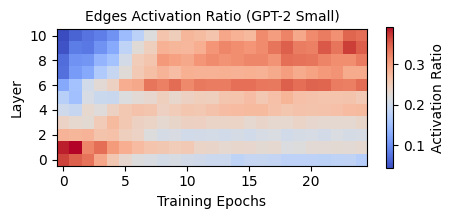

In [33]:
task = "city"
type = "new"
freq = "high"
# for task in ["city"]:
#     for type in ["new", "revised"]:
#         for freq in ["high", "medium", "low"]:
layer_distribution_matrix = []
for i in range(len(indexes)):
    layer_distribution = np.array(count_edges_at_layers(graph[task][type][freq][i], activated=True)) / np.array(count_edges_at_layers(graph[task][type][freq][i], activated=False))
    layer_distribution_matrix.append(layer_distribution[:-1])

layer_distribution_matrix = np.array(layer_distribution_matrix)

# Set the figure size to increase x-axis width
plt.figure(figsize=(5,4))  # Adjust width and height as needed

im = plt.imshow(layer_distribution_matrix.T, cmap='coolwarm', interpolation='nearest')
plt.title('Edges Activation Ratio (GPT-2 Small)', fontsize=10)
plt.ylabel('Layer')
plt.xlabel('Training Epochs')
cbar = plt.colorbar(im, shrink=0.46)
cbar.set_label('Activation Ratio')
# 反转 y 轴
plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 12, 2))
plt.show()

In [34]:
eval_data_file = f"/mnt/8t/oyx/KCPT/data/entities_50000/circuit_{circuit_n}/{model}/{task}.jsonl"

eval_data = read_jsonl(eval_data_file)
eval_data = [d for d in eval_data if d["type"] == type]
if freq == "high":
    eval_data = [d for d in eval_data if int(d["frequency"]) > 5]
elif freq == "medium":
    eval_data = [d for d in eval_data if 2 <= int(d["frequency"]) <= 5]
elif freq == "low":
    eval_data = [d for d in eval_data if int(d["frequency"]) == 1]

prompt_template = {
    "city": "{} lives in the city of",
    "major": "{} majors in the field of",
    "company": "{} works for the company of"
}

In [35]:
import random
import os
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformer_lens import HookedTransformer
from analyzer import ComponentAnalyzer

task = "city"
type = "new"
freq = "high"

def compute_average_of_ratios(ratio_list):
    if not ratio_list:
        return []  # 处理空列表情况
    # 直接累加并计算均值
    length = len(ratio_list)
    overall_ratio = [[0] * len(ratio_list[0][0]) for _ in range(len(ratio_list[0]))]
    
    for r in ratio_list:
        for l in range(len(r)):
            for h in range(len(r[l])):
                overall_ratio[l][h] += r[l][h]
    
    # 对每个元素求平均
    for l in range(len(overall_ratio)):
        for h in range(len(overall_ratio[l])):
            overall_ratio[l][h] /= length

    return overall_ratio

# Function to create circuit head sets based on graph
def create_circuit_head_set(overall_head_set):
    circuit_head_set = set()
    for l, h in overall_head_set:
        if g.nodes[f"a{l}.h{h}"].in_graph:
            circuit_head_set.add((l, h))
    return circuit_head_set

# Initialize lists
overall_DLA_subject_ratio_list = []
overall_DLA_relation_ratio_list = []

circuit_subject_head_set_list = []
circuit_relation_head_set_list = []
circuit_mixed_head_set_list = []

# Loop over indexes
for index in tqdm(indexes):
    # Load model and tokenizer
    g = graph[task][type][freq][index]
    model_name_or_path = os.path.join(directory_path, subdirectories[index])
    hf_model = AutoModelForCausalLM.from_pretrained(model_name_or_path)
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

    hooked_model = HookedTransformer.from_pretrained(
        model, device="cuda", fold_ln=False, center_writing_weights=False, center_unembed=False,
        hf_model=hf_model, tokenizer=tokenizer, local_path=model_name_or_path
    )
    
    # Configure hooked model
    hooked_model.cfg.use_split_qkv_input = True
    hooked_model.cfg.use_attn_result = True
    hooked_model.cfg.use_hook_mlp_in = True

    # Initialize temporary lists for this model
    DLA_subject_ratio_list = []
    DLA_relation_ratio_list = []

    # Process each data point (sample once before loop to avoid redundant random sampling)
    # sampled_data = random.sample(eval_data, 10)
    
    for datapoint in eval_data:
        analyzer = ComponentAnalyzer(hooked_model, prompt_template[task].format(datapoint["clean_subject"]),
                                     datapoint["clean_label"], datapoint["clean_subject"])
        DLA_subject_ratio, DLA_relation_ratio = analyzer.calculate_DLA_by_source()

        # Collect results
        DLA_subject_ratio_list.append(DLA_subject_ratio)
        DLA_relation_ratio_list.append(DLA_relation_ratio)
    
    # Append mean DLA ratios to overall lists
    average_DLA_subject_ratio = compute_average_of_ratios(DLA_subject_ratio_list)
    average_DLA_relation_ratio = compute_average_of_ratios(DLA_relation_ratio_list)
    overall_DLA_subject_ratio_list.append(average_DLA_subject_ratio)
    overall_DLA_relation_ratio_list.append(average_DLA_relation_ratio)

    subject_head_set = set()
    relation_head_set = set()
    mixed_head_set = set()

    threshold = 10
    for l in range(analyzer.model.cfg.n_layers):
        for h in range(analyzer.model.cfg.n_heads):
            ratio = average_DLA_subject_ratio[l][h] / average_DLA_relation_ratio[l][h]
            if ratio > threshold or ratio < -threshold:
                subject_head_set.add((l, h))
            elif ratio > -1.0/threshold and ratio < 1.0/threshold:
                relation_head_set.add((l, h))
            else:
                mixed_head_set.add((l, h))

    # Generate circuit head sets
    circuit_subject_head_set = create_circuit_head_set(subject_head_set)
    circuit_relation_head_set = create_circuit_head_set(relation_head_set)
    circuit_mixed_head_set = create_circuit_head_set(mixed_head_set)

    # Append circuit head sets to the overall lists
    circuit_subject_head_set_list.append(circuit_subject_head_set)
    circuit_relation_head_set_list.append(circuit_relation_head_set)
    circuit_mixed_head_set_list.append(circuit_mixed_head_set)

  0%|          | 0/25 [00:00<?, ?it/s]

Loaded pretrained model gpt2 into HookedTransformer


  4%|▍         | 1/25 [00:18<07:26, 18.62s/it]

Loaded pretrained model gpt2 into HookedTransformer


  8%|▊         | 2/25 [00:36<06:57, 18.16s/it]

Loaded pretrained model gpt2 into HookedTransformer


 12%|█▏        | 3/25 [00:54<06:35, 17.99s/it]

Loaded pretrained model gpt2 into HookedTransformer


 16%|█▌        | 4/25 [01:12<06:16, 17.91s/it]

Loaded pretrained model gpt2 into HookedTransformer


 20%|██        | 5/25 [01:29<05:57, 17.87s/it]

Loaded pretrained model gpt2 into HookedTransformer


 24%|██▍       | 6/25 [01:47<05:39, 17.85s/it]

Loaded pretrained model gpt2 into HookedTransformer


 28%|██▊       | 7/25 [02:05<05:20, 17.82s/it]

Loaded pretrained model gpt2 into HookedTransformer


 32%|███▏      | 8/25 [02:23<05:02, 17.82s/it]

Loaded pretrained model gpt2 into HookedTransformer


 36%|███▌      | 9/25 [02:41<04:45, 17.82s/it]

Loaded pretrained model gpt2 into HookedTransformer


 40%|████      | 10/25 [03:03<04:49, 19.28s/it]

Loaded pretrained model gpt2 into HookedTransformer


 44%|████▍     | 11/25 [03:21<04:24, 18.88s/it]

Loaded pretrained model gpt2 into HookedTransformer


 48%|████▊     | 12/25 [03:39<04:02, 18.62s/it]

Loaded pretrained model gpt2 into HookedTransformer


 52%|█████▏    | 13/25 [03:57<03:41, 18.47s/it]

Loaded pretrained model gpt2 into HookedTransformer


 56%|█████▌    | 14/25 [04:15<03:21, 18.33s/it]

Loaded pretrained model gpt2 into HookedTransformer


 60%|██████    | 15/25 [04:33<03:02, 18.23s/it]

Loaded pretrained model gpt2 into HookedTransformer


 64%|██████▍   | 16/25 [04:52<02:46, 18.51s/it]

Loaded pretrained model gpt2 into HookedTransformer


 68%|██████▊   | 17/25 [05:10<02:27, 18.39s/it]

Loaded pretrained model gpt2 into HookedTransformer


 72%|███████▏  | 18/25 [05:29<02:08, 18.32s/it]

Loaded pretrained model gpt2 into HookedTransformer


 76%|███████▌  | 19/25 [05:47<01:49, 18.21s/it]

Loaded pretrained model gpt2 into HookedTransformer


 80%|████████  | 20/25 [06:04<01:30, 18.12s/it]

Loaded pretrained model gpt2 into HookedTransformer


 84%|████████▍ | 21/25 [06:22<01:12, 18.06s/it]

Loaded pretrained model gpt2 into HookedTransformer


 88%|████████▊ | 22/25 [06:40<00:54, 18.02s/it]

Loaded pretrained model gpt2 into HookedTransformer


 92%|█████████▏| 23/25 [07:03<00:39, 19.52s/it]

Loaded pretrained model gpt2 into HookedTransformer


 96%|█████████▌| 24/25 [07:21<00:19, 19.04s/it]

Loaded pretrained model gpt2 into HookedTransformer


100%|██████████| 25/25 [07:39<00:00, 18.39s/it]


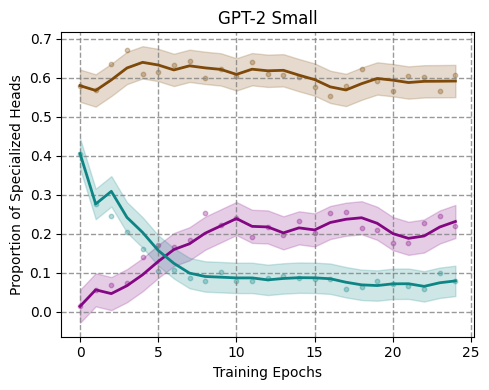

In [36]:
# 计算每个集合的元素个数
subject_head_count = [len(s) / g.count_included_nodes() for s, g in zip(circuit_subject_head_set_list, graph[task][type][freq])]
relation_head_count = [len(s) / g.count_included_nodes() for s, g in zip(circuit_relation_head_set_list, graph[task][type][freq])]
mixed_head_count = [len(s) / g.count_included_nodes() for s, g in zip(circuit_mixed_head_set_list, graph[task][type][freq])]

x = np.arange(len(indexes))

plt.figure(figsize=(5, 4))

for y, head_name, color_cnt in zip([subject_head_count, relation_head_count, mixed_head_count], ["Mover Head", "Relation Head", "Mixture Head"], ["#830783", "#0E8585", "#7E4909"]):
    window_size = 3
    x_fit = x
    y_fit = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    y_fit = np.array(y[:window_size-1] + y_fit.tolist())
    y_residuals = y - y_fit
    std_residuals = np.std(y_residuals)
    
    line, = plt.plot(x_fit.ravel(), y_fit, label=head_name, linewidth=2, color=color_cnt)
    plt.scatter(x, y, color=line.get_color(), s=10, alpha=0.3)
    
    # 绘制阴影区域，偏离值区域
    plt.fill_between(x_fit.ravel(), y_fit - 1.96 * std_residuals, y_fit + 1.96 * std_residuals, color=line.get_color(), alpha=0.2)


# 添加标签和标题
plt.title('GPT-2 Small')

plt.xlabel("Training Epochs")
plt.ylabel("Proportion of Specialized Heads")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)
# plt.legend(loc='upper right')
plt.tight_layout()
# plt.ylim(0, 0.9)
plt.show()


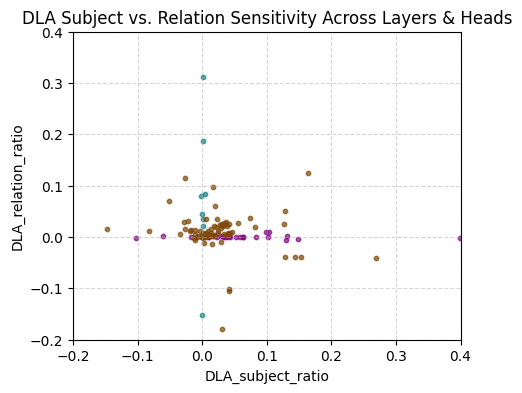

In [37]:
index = -1

subject_head_set_subject_ratios =  []
subject_head_set_relation_ratios = []
relation_head_set_subject_ratios = []
relation_head_set_relation_ratios = []
mixed_head_set_subject_ratios = []
mixed_head_set_relation_ratios = []

for l,h in circuit_subject_head_set_list[index]:
    subject_head_set_subject_ratios.append(overall_DLA_subject_ratio_list[index][l][h])
    subject_head_set_relation_ratios.append(overall_DLA_relation_ratio_list[index][l][h])

for l,h in circuit_relation_head_set_list[index]:
    relation_head_set_subject_ratios.append(overall_DLA_subject_ratio_list[index][l][h])
    relation_head_set_relation_ratios.append(overall_DLA_relation_ratio_list[index][l][h])

for l,h in circuit_mixed_head_set_list[index]:
    mixed_head_set_subject_ratios.append(overall_DLA_subject_ratio_list[index][l][h])
    mixed_head_set_relation_ratios.append(overall_DLA_relation_ratio_list[index][l][h])



# 绘制散点图
plt.figure(figsize=(5, 4))
for subject_ratio,relation_ratio, color_cnt in zip([subject_head_set_subject_ratios, relation_head_set_subject_ratios, mixed_head_set_subject_ratios], [subject_head_set_relation_ratios, relation_head_set_relation_ratios, mixed_head_set_relation_ratios], ["#830783", "#0E8585", "#7E4909"]):
    plt.scatter(subject_ratio, relation_ratio, alpha=0.7, color=color_cnt, s=10)


# # 添加斜率=10 (y = 10x) 和 斜率=1/10 (y = 0.1x) 的辅助线
# x = np.linspace(-0.2, 0.5, 100)
# plt.plot(x, 10*x, label="y = 10x", color='b', linestyle='--')
# plt.plot(x, -10*x, label="y = -10x", color='b', linestyle='--')
# plt.plot(x, 0.1*x, label="y = 0.1x", color='r', linestyle='--')
# plt.plot(x, -0.1*x, label="y = -0.1x", color='r', linestyle='--')

# 设置坐标轴和标题
plt.xlabel("DLA_subject_ratio")
plt.ylabel("DLA_relation_ratio")
plt.title("DLA Subject vs. Relation Sensitivity Across Layers & Heads")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(-0.2, 0.4)
plt.ylim(-0.2, 0.4)
plt.show()


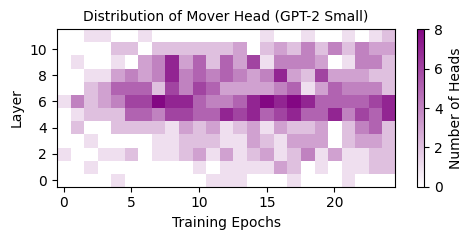

In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义颜色渐变
colors = ["#FFFFFF", "#830783"] 
cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

# 初始化二维列表，表示每个epoch中每一层出现的二元组个数
num_epochs = len(circuit_subject_head_set_list)
num_layers = analyzer.model.cfg.n_layers

# 构造二维列表
layer_count_matrix = np.zeros((num_epochs, num_layers), dtype=int)

# 填充矩阵
for epoch_idx, epoch_data in enumerate(circuit_subject_head_set_list):
    for node in epoch_data:
        layer_idx = node[0] - 1  # 假设层数从1到12，所以需要减去1来对应矩阵的索引
        layer_count_matrix[epoch_idx, layer_idx] += 1

# 交换矩阵的维度：将训练周期作为纵轴，层数作为横轴
transposed_layer_count_matrix = layer_count_matrix.T

# 绘制修改后的矩阵图
plt.figure(figsize=(5, 2.5))
plt.imshow(transposed_layer_count_matrix, cmap=cmap, aspect='auto', interpolation='nearest')
plt.colorbar(label="Number of Heads")

# 设置标签
plt.xticks(np.arange(0, num_epochs, 5))
plt.yticks(np.arange(0, num_layers, 2))

# 设置标题和标签
plt.title("Distribution of Mover Head (GPT-2 Small)", fontsize=10)
plt.xlabel("Training Epochs")
plt.ylabel("Layer")

# 反转 y 轴
plt.gca().invert_yaxis()

# 显示图形
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

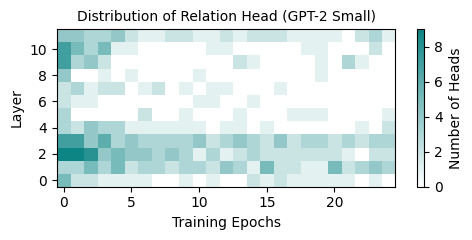

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义颜色渐变
colors = ["#FFFFFF", "#0E8585"]
cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

# 初始化二维列表，表示每个epoch中每一层出现的二元组个数
num_epochs = len(circuit_relation_head_set_list)
num_layers = analyzer.model.cfg.n_layers

# 构造二维列表
layer_count_matrix = np.zeros((num_epochs, num_layers), dtype=int)

# 填充矩阵
for epoch_idx, epoch_data in enumerate(circuit_relation_head_set_list):
    for node in epoch_data:
        layer_idx = node[0] - 1  # 假设层数从1到12，所以需要减去1来对应矩阵的索引
        layer_count_matrix[epoch_idx, layer_idx] += 1

# 绘制矩阵图
plt.figure(figsize=(10, 6))
# 交换矩阵的维度：将训练周期作为纵轴，层数作为横轴
transposed_layer_count_matrix = layer_count_matrix.T


# 绘制修改后的矩阵图
plt.figure(figsize=(5, 2.5))
plt.imshow(transposed_layer_count_matrix, cmap=cmap, aspect='auto', interpolation='nearest')
plt.colorbar(label="Number of Heads")

# 设置标签
plt.xticks(np.arange(0, num_epochs, 5))
plt.yticks(np.arange(0, num_layers, 2))

# 设置标题和标签
plt.title("Distribution of Relation Head (GPT-2 Small)", fontsize=10)
plt.xlabel("Training Epochs")
plt.ylabel("Layer")

# 反转 y 轴
plt.gca().invert_yaxis()

# 显示图形
plt.tight_layout()
plt.show()

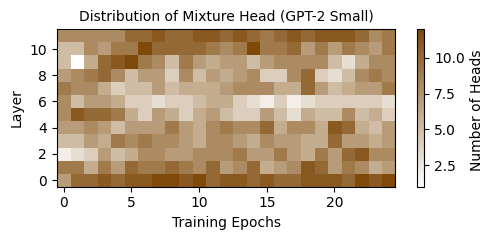

In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义颜色渐变
colors = ["#FFFFFF", "#7E4909"] 
cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

# 初始化二维列表，表示每个epoch中每一层出现的二元组个数
num_epochs = len(circuit_mixed_head_set_list)
num_layers = analyzer.model.cfg.n_layers

# 构造二维列表
layer_count_matrix = np.zeros((num_epochs, num_layers), dtype=int)

# 填充矩阵
for epoch_idx, epoch_data in enumerate(circuit_mixed_head_set_list):
    for node in epoch_data:
        layer_idx = node[0] - 1  # 假设层数从1到12，所以需要减去1来对应矩阵的索引
        layer_count_matrix[epoch_idx, layer_idx] += 1

# 交换矩阵的维度：将训练周期作为纵轴，层数作为横轴
transposed_layer_count_matrix = layer_count_matrix.T

# 绘制修改后的矩阵图
plt.figure(figsize=(5, 2.5))
plt.imshow(transposed_layer_count_matrix, cmap=cmap, aspect='auto', interpolation='nearest')
plt.colorbar(label="Number of Heads ")

# 设置标签
plt.xticks(np.arange(0, num_epochs, 5))
plt.yticks(np.arange(0, num_layers, 2))

# 设置标题和标签
plt.title("Distribution of Mixture Head (GPT-2 Small)", fontsize=10)
plt.xlabel("Training Epochs")
plt.ylabel("Layer")

# 反转 y 轴
plt.gca().invert_yaxis()

# 显示图形
plt.tight_layout()
plt.show()